# Project IART Class - COVID-19 mobility records 
## Machine Learning Analysis - Regression problems
### Explore data, create models and evaluate

In [1]:
#Main imports
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
import sys
import os

### Explore the data
Let's start by creating some directory variables:

In [4]:
code_path=os.getcwd()
data_path=code_path.replace('code','data')
print("Code path : ",code_path)
print("Data path : ",data_path)

Code path :  /home/fatimab/IART_classes/COVID-19/code
Data path :  /home/fatimab/IART_classes/COVID-19/data


Now let's read data.csv from the data_path:

In [5]:
os.chdir(data_path)
covid_data=pd.read_csv("data.csv",na_values=["NA"])
os.chdir(code_path)
covid_data.head()

,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
0,AR,Argentina,2020-02-23,8.185,17.563,0.437,13.644,5.334,-2.486,0,0
1,AR,Argentina,2020-02-24,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0
2,AR,Argentina,2020-02-25,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0
3,AR,Argentina,2020-02-26,2.304,5.399,-2.273,0.845,9.461,12.584,0,0
4,AR,Argentina,2020-02-27,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0


Print out summary statistics about the data set:

In [6]:
covid_data.describe()

,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,-8.229424,-13.394035,9.545845,-26.205257,-28.370122,-19.126192,10699.773562,566.007344
std,21.313369,32.891636,10.545377,30.992728,30.211025,25.983021,31656.464952,2008.520488
min,-84.798000,-91.456000,-3.647000,-95.158000,-88.956000,-79.293000,0.000000,0.000000
25%,-16.578000,-32.841000,0.744000,-49.975000,-54.145000,-40.582000,27.000000,0.000000
50%,0.088000,-6.498000,5.912000,-14.427000,-19.502000,-8.395000,648.000000,6.000000
75%,4.838000,6.961000,16.695000,-0.632000,-0.970000,1.037000,4585.000000,79.000000
max,59.474000,75.002000,40.343000,19.699000,16.822000,21.347000,336912.000000,15887.000000


As we can see from above, this data may need some normalization or standardization. The min max values from the features have a wide range and differ a lot between features, which can lead to having some features that weight more than others in our models. In a first approach, we want to take all the features in the same consideration.


Here's some important data about the dataset provided by https://www.kaggle.com/gustavomodelli/covid-community-measures:


Description of community measures: (% Change)

 * Retail & recreation: Mobility trends for places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters.

 * Grocery & pharmacy: Mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.

 * Parks: Mobility trends for places like national parks, public beaches, marinas, dog parks, plazas, and public gardens.

 * Transit stations: Mobility trends for places like public transport hubs such as subway, bus, and train stations.

 * Workplaces: Mobility trends for places of work.

 * Residential: Mobility trends for places of residence.
 
 Notice that they say data is in % Change, meaning that the actual values in the file are normalized by the following:
 
 
 <center>Percent Change = (New Number-Original Number) / Original Number

Let's also see how many samples the dataset has:

In [7]:
print(covid_data.shape)
print("Number of samples : ", covid_data.shape[0])
print("Number of features & labels : ", covid_data.shape[1])

(817, 11)
Number of samples :  817
Number of features & labels :  11


This means we have 817 rows - samples - and 11 columns - features. For a simpler analysis, lets transform the date column. Date column goes from 23-02-2020 to 05-04-2020 for each country, so let's make it from day 0 to day 42. If there's a total of 43 days per country, then we have a total of 19 countries, but let's confirm that:

In [8]:
countries_column=np.array(covid_data.loc[:,"country"])
countries=np.unique(countries_column)
print("Countries: " , countries)
print("\n")
print("Number of countries: ", countries.shape[0])

Countries:  ['Argentina' 'Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India'
 'Indonesia' 'Italy' 'Japan' 'Mexico' 'Saudi Arabia' 'South Africa'
 'South Korea' 'Spain' 'Sweden' 'Turkey' 'US' 'United Kingdom']


Number of countries:  19


In [9]:
#date_column=np.array(covid_data.loc[:,"date"])
days=np.arange(43)
days_column=np.tile(days,countries.shape[0])
covid_data.loc[:,"date"]=days_column
covid_data.head(10)

,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
0,AR,Argentina,0,8.185,17.563,0.437,13.644,5.334,-2.486,0,0
1,AR,Argentina,1,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0
2,AR,Argentina,2,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0
3,AR,Argentina,3,2.304,5.399,-2.273,0.845,9.461,12.584,0,0
4,AR,Argentina,4,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0
5,AR,Argentina,5,2.075,-7.859,-0.577,2.877,7.973,12.857,0,0
6,AR,Argentina,6,4.685,-7.582,1.409,5.265,5.595,2.156,0,0
7,AR,Argentina,7,2.873,-10.518,2.417,-2.509,0.944,-2.360,0,0
8,AR,Argentina,8,3.958,-8.264,-1.363,0.537,6.931,16.164,0,0
9,AR,Argentina,9,5.090,-6.241,-1.330,0.200,8.202,16.192,1,0


Great! Now our date column is in count of number of days instead of absolute time date!

Notice that we don't need to columns for country as we have ISO and COUNTRY, so let's delete the ISO column. 


In [10]:
del covid_data["iso"]
covid_data.head()

,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
0,Argentina,0,8.185,17.563,0.437,13.644,5.334,-2.486,0,0
1,Argentina,1,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0
2,Argentina,2,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0
3,Argentina,3,2.304,5.399,-2.273,0.845,9.461,12.584,0,0
4,Argentina,4,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0


So now let's look at some conjugations of the data, being aware of the country:

''

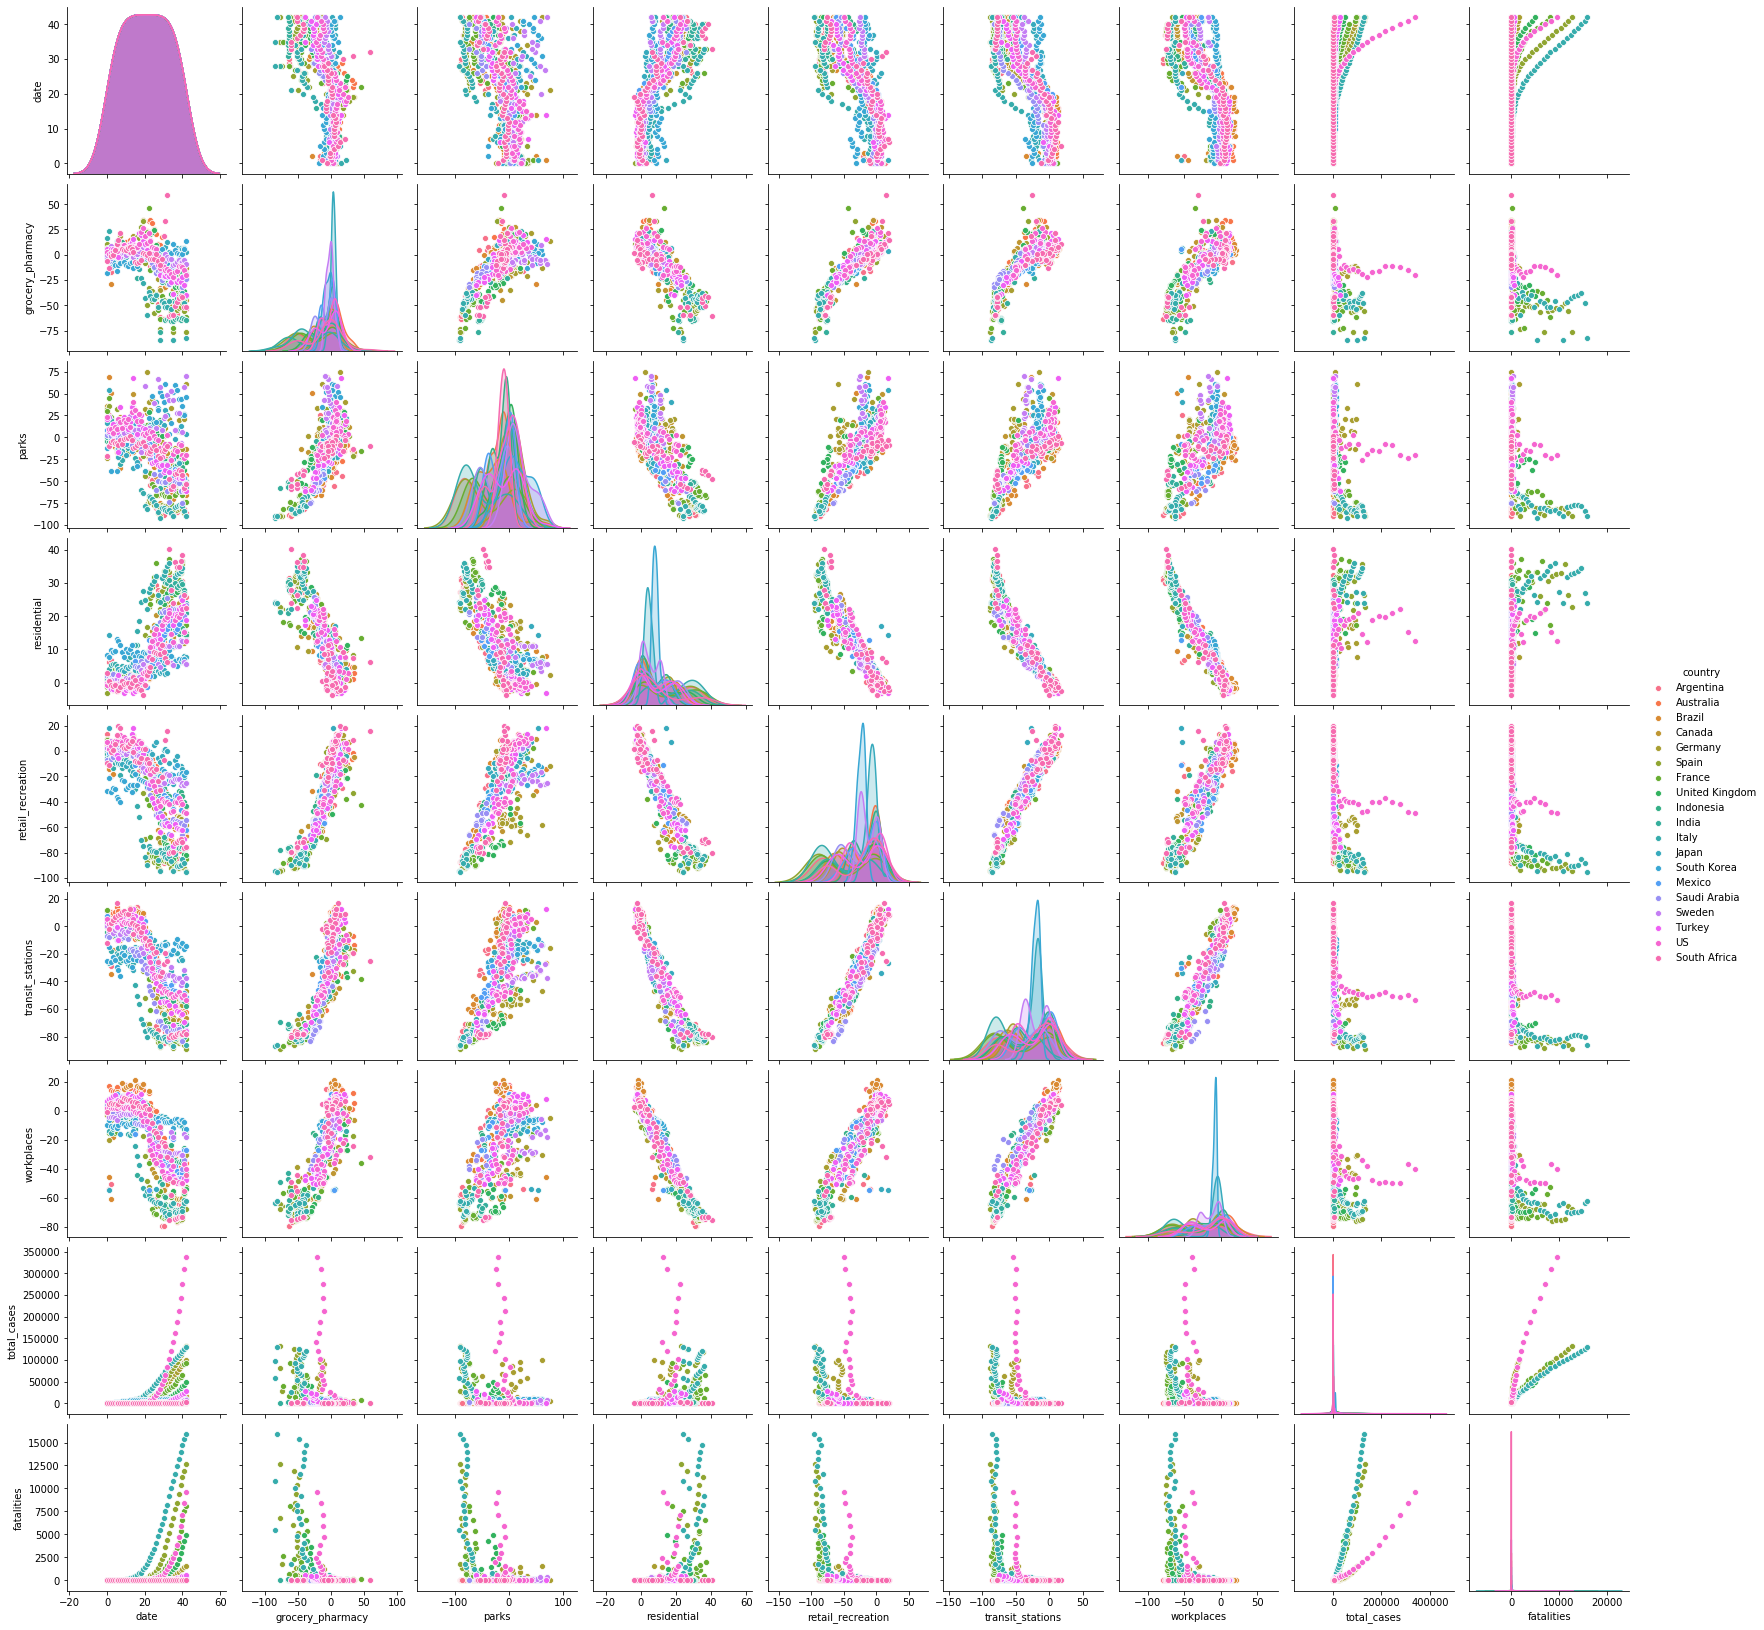

In [11]:
sb.pairplot(covid_data.dropna(),hue="country")
;

We can already see that some data correlates in a linear way, for instance, retail_recreation & transit_stations. Also, the total_cases and fatalities relates in an exponential way with the date.

At a first sight, no outliers are obvious, that can be derived from the fact that the number of samples is high. 

We can also make this kind of plot without country division:

''

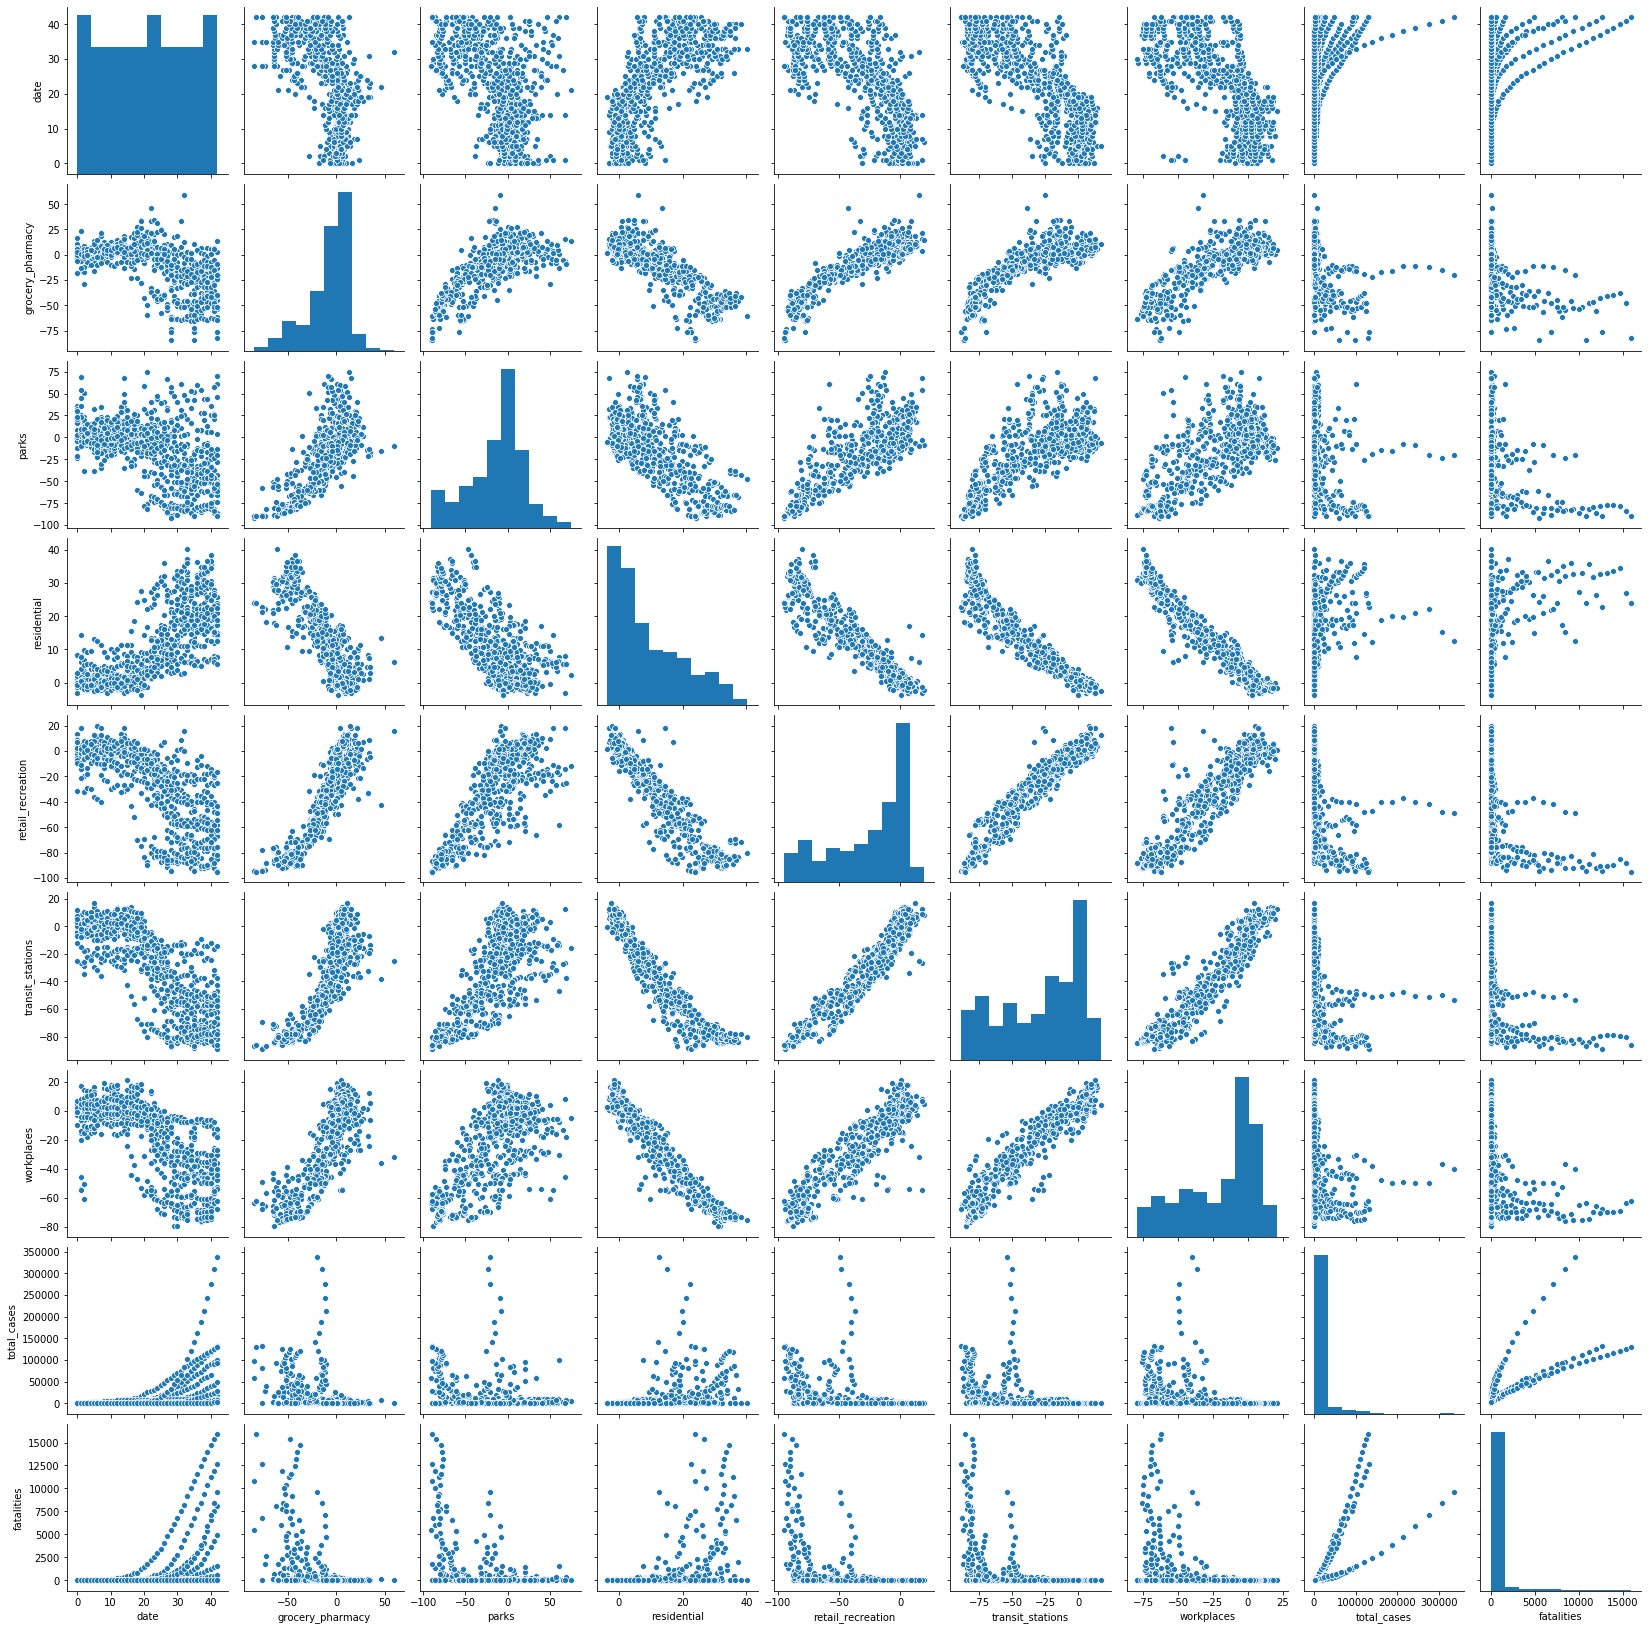

In [12]:
sb.pairplot(covid_data.dropna())
;

Notice how total_cases and fatalities relate to date in a logaritmic way. Let's transform this data and see how it behaves for one of the countries:


<ipython-input-26-74c993724dd8>:13: RuntimeWarning: divide by zero encountered in log
  axs[1,0].scatter(days_column,np.log(total_cases_column))
<ipython-input-26-74c993724dd8>:20: RuntimeWarning: divide by zero encountered in log
  axs[1,1].scatter(days_column,np.log(fatalities_column))


[Text(0, 0.5, 'log(Fatalities)'), Text(0.5, 0, 'Days')]

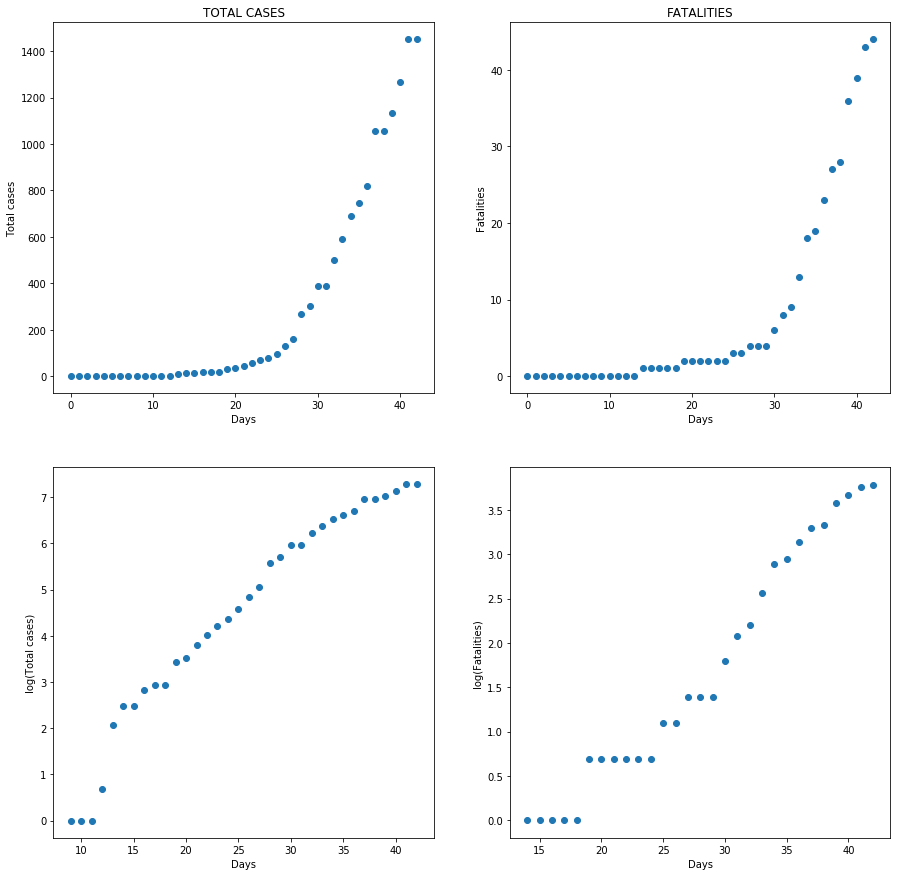

In [26]:
days_column=np.array(covid_data.loc[:,"date"])[:43]
total_cases_column=np.array(covid_data.loc[:,"total_cases"])[:43]
fatalities_column=np.array(covid_data.loc[:,"fatalities"])[:43]



import matplotlib.pyplot as plt
fig,axs=plt.subplots(2,2,figsize=(15,15))
axs[0,0].scatter(days_column,total_cases_column)
axs[0,0].set(xlabel="Days",ylabel="Total cases")
axs[0,0].set_title("TOTAL CASES")

axs[1,0].scatter(days_column,np.log(total_cases_column))
axs[1,0].set(xlabel="Days",ylabel="log(Total cases)")

axs[0,1].scatter(days_column,fatalities_column)
axs[0,1].set(xlabel="Days",ylabel="Fatalities")
axs[0,1].set_title("FATALITIES")

axs[1,1].scatter(days_column,np.log(fatalities_column))
axs[1,1].set(xlabel="Days",ylabel="log(Fatalities)")




Well it's not perfect, but we can see some behaviour in this way.

## Divide the data
It is important that we don't use the same countries for training and testing the data, since we samples of the same countries would create bias entries for testing. 

There are two obvious regression problems we can try to solve using this data: predicting the total_cases and the fatalities according to the other columns of features.


### First regression problem: predict total_cases
For this first problem, the following features will be used:

 * Date
 * Grocery_pharmacy
 * Parks
 * Residential
 * Retail_recreation 
 * Transit_stations
 * Workplaces
 
Notice that we don't use fatalities for this problem, as it would be a bias feature for this problem. For the next task, the fatalities will be predicted with and without the total number of cases, for results comparison.



For implementing a cross validation method that considers the country separation, we will be using sklearn.model_selection methods:

In [78]:
data=covid_data.copy()

previous_cases_column=[]
for i in range(0,len(data.date)):
  if data.date[i]==0:
    previous_cases_column.append(0)

  elif data.date[i]==42:
    previous_cases_column.append(-1)

  else:
    previous_cases_column.append(data.total_cases[i-1])

previous_cases_column=np.array(previous_cases_column)

data["previous_total_cases"]=previous_cases_column

days43=(data.previous_total_cases!=-1)
data=data[days43]
print(data.shape)

all_features=data[['grocery_pharmacy','parks','residential','retail_recreation','transit_stations','workplaces','previous_total_cases']].values
all_labels=data['total_cases'].values
all_groups=np.array(data.loc[:,"country"])

print("Features shape : ",all_features.shape)
print("All labels shape : ", all_labels.shape)
print("All groups shape : ", all_groups.shape)

(798, 11)
Features shape :  (798, 7)
All labels shape :  (798,)
All groups shape :  (798,)


It is important to normalize/standardize our data, this should be done individually for each train/val/test set, so there's no bias in the values that help us do this normalization.

Let's take a look again to our data statistics:


In [79]:
data.describe()

,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities,previous_total_cases
count,798.00000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,20.50000,-7.609734,-12.894937,9.396643,-25.355416,-27.550677,-18.654798,9785.442356,510.258145,8690.788221
std,12.12852,20.809402,32.310600,10.582807,30.659970,29.959014,25.993387,28883.428520,1856.815185,25883.266515
min,0.00000,-84.798000,-91.456000,-3.647000,-94.790000,-88.201000,-79.293000,0.000000,0.000000,0.000000
25%,10.00000,-15.751000,-31.911750,0.688750,-47.170250,-52.739500,-38.144500,24.250000,0.000000,15.250000
50%,20.50000,0.298500,-5.988000,5.696000,-12.838500,-18.775500,-7.627500,573.500000,6.000000,452.500000
75%,31.00000,4.892000,7.177750,16.536750,-0.587250,-0.709000,1.242250,4354.500000,74.250000,3666.250000
max,41.00000,59.474000,75.002000,40.343000,19.699000,16.822000,21.347000,308693.000000,15362.000000,275426.000000


Looking at the mean, std, min and max values, we can see that if we do not normalize this data, some features may have more importance than others. 

To prevent this, it's important to normalize the features. But first, we must split them in folds for a cross-validation method.

In [80]:
from sklearn.model_selection import GroupKFold

#Define number of splits
n_splits=5

group_kfold=GroupKFold(n_splits=n_splits)
print("Splits", group_kfold.get_n_splits(all_features,all_labels,all_groups))
print(group_kfold)

Splits 5
GroupKFold(n_splits=5)


Example for K-Fold Split taking groups in considerations! We make 5 different splits from our data. As we can see bellow, none of the test ID's (countries) are the same in each split.

In [38]:
counter=1
for train_idx,test_idx in group_kfold.split(all_features,all_labels,all_groups):
    print("SPLIT : ", counter)
    #print("TRAIN :", train_idx, "    TEST : ", test_idx)
    print("TRAIN SPLIT: ")
    print(np.unique(np.array(covid_data.loc[train_idx]["country"])))
    print("TEST SPLIT: ")
    print(np.unique(np.array(covid_data.loc[test_idx]["country"])))
    print("\n")
    counter+=1

SPLIT :  1
TRAIN SPLIT: 
['Argentina' 'Australia' 'Brazil' 'Canada' 'Germany' 'India' 'Indonesia'
 'Italy' 'Japan' 'Mexico' 'Saudi Arabia' 'South Africa' 'South Korea'
 'Sweden' 'Turkey']
TEST SPLIT: 
['France' 'Spain' 'US' 'United Kingdom']


SPLIT :  2
TRAIN SPLIT: 
['Argentina' 'Australia' 'Brazil' 'Canada' 'France' 'India' 'Indonesia'
 'Japan' 'Saudi Arabia' 'South Africa' 'South Korea' 'Spain' 'Turkey' 'US'
 'United Kingdom']
TEST SPLIT: 
['Germany' 'Italy' 'Mexico' 'Sweden']


SPLIT :  3
TRAIN SPLIT: 
['Argentina' 'Brazil' 'Canada' 'France' 'Germany' 'Indonesia' 'Italy'
 'Japan' 'Mexico' 'South Africa' 'South Korea' 'Spain' 'Sweden' 'US'
 'United Kingdom']
TEST SPLIT: 
['Australia' 'India' 'Saudi Arabia' 'Turkey']


SPLIT :  4
TRAIN SPLIT: 
['Australia' 'Canada' 'France' 'Germany' 'India' 'Italy' 'Japan' 'Mexico'
 'Saudi Arabia' 'South Korea' 'Spain' 'Sweden' 'Turkey' 'US'
 'United Kingdom']
TEST SPLIT: 
['Argentina' 'Brazil' 'Indonesia' 'South Africa']


SPLIT :  5
TRAIN SPLIT: 

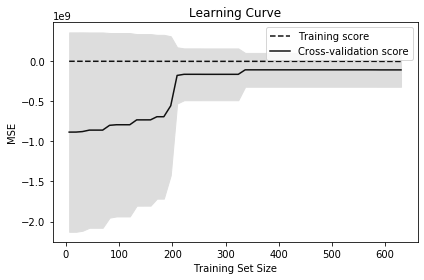

In [82]:
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsRegressor #KNeighborsRegressor(n_neighbors=2)
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression


train_sizes, train_scores, test_scores = learning_curve(KNeighborsRegressor(n_neighbors=2),
                                                        all_features,
                                                        all_labels,
                                                        all_groups,
                                                        cv=group_kfold,
                                                        scoring='neg_mean_squared_error',
                                                        train_sizes=np.linspace(0.01, 1.0, 50))


# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()



For standardize the data, we'll use sklearn StandardScaler from preprocessing.

The standard score of a sample x is calculated as:

<center> z = (x - u) / s

where u is the mean of the training samples, and s is the standard deviation of the training samples.
    
We are going to fit a set of different machine learning algorithms for regression provided by Scikit-Learn. Each algorithm will be trained and tested for each fold, showing and saving each fold results for further comparison.

## ADICIONAR AQUI PARAGRAFO SOBRE AS METRICAS A USAR
https://scikit-learn.org/stable/modules/learning_curve.html - também é importante fazermos isto
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

METRICAS --- > https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914

#### First algorithm : KNN Regression

In [70]:
#Go inside the loop for each fold
#Standardize each set (X_train, X_test)
#There's no need to standardize the results as the models predicts a function that fits the result
#Save 1 country for testing

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import learning_curve


#Number of neighbors must be adjusted

train_scores=[]
val_scores=[]

for train_idx,test_idx in group_kfold.split(all_inputs,all_labels,all_groups):
    #Train set
    train_countries=np.unique(np.array(covid_data.loc[train_idx]["country"]))
    X_train=all_inputs[train_idx]
    y_train=all_labels[train_idx]
    
    #Test & Validation set
    testval_countries=np.unique(np.array(covid_data.loc[test_idx]["country"]))
    X_testval=all_inputs[test_idx]
    y_testval=all_labels[test_idx]
    
    #Validation set
    val_countries=np.delete(testval_countries,-1)
    X_val=X_testval[:X_testval.shape[0]-43]
    y_val=y_testval[:y_testval.shape[0]-43]
     
    
    #Test set
    test_country=(testval_countries[-1])
    X_test=X_testval[X_testval.shape[0]-43:]
    y_test=y_testval[y_testval.shape[0]-43:] 
    
    
    #Scaling the data
    scaler=StandardScaler()
    
    X_train[:,1:7]=scaler.fit_transform(X_train[:,1:7])
    X_val[:,1:7]=scaler.transform(X_val[:,1:7])
    X_test[:,1:7]=scaler.transform(X_test[:,1:7])
    
    model=KNeighborsRegressor(n_neighbors=1)
    model.fit(X_train,y_train)
    
    predictions_train=model.predict(X_train)
    predictions_val=model.predict(X_val)
           
    mse_train=mse(y_train,predictions_train)
    mse_val=mse(y_val,predictions_val)
    
    train_scores.append(mse_train)
    val_scores.append(mse_val)

print(np.round(y_val))
print(np.round(predictions_val))
    
print("Train scores MSE: ", train_scores)
print("Validation scores MSE: ", val_scores)
    

[    9    10    11    11    13    14    20    24    27    30    33    37
    49    54    64    77    79   108   117   191   196   250   413   470
   648   791   933  1267  1456  2075  2777  3238  4029  4669  5563  6267
  7385  8514  9547 11271 12424 12965 15743   147   159   170   189   214
   228   241   256   274   293   331   360   420   461   502   511   581
   639   639   701   773   839   839   878   889   924   963  1007  1101
  1128  1193  1307  1387  1468  1693  1866  1866  1953  2178  2495  2617
  3139  3139]
[1.20000e+01 0.00000e+00 0.00000e+00 1.30000e+01 3.80000e+01 0.00000e+00
 4.00000e+00 0.00000e+00 5.00000e+00 1.96000e+02 2.62000e+02 0.00000e+00
 4.00000e+02 5.00000e+02 0.00000e+00 0.00000e+00 1.79400e+03 4.59000e+02
 1.59600e+03 2.11200e+03 2.65800e+03 3.43100e+03 4.56500e+03 6.35300e+03
 7.71500e+03 1.53200e+04 1.98480e+04 5.06700e+03 5.74500e+03 4.35860e+04
 8.16400e+03 9.64000e+03 1.18120e+04 1.01580e+05 1.21313e+05 1.40757e+05
 1.08270e+04 1.88018e+05 2.13214e+05 